# LOAN PREDICTION DATASET
#### The dataset is of loan risk assessment featuring 1000 entries exploring key factors like age, income, assets, credit score, debt-to-income ratio, existing loans and criminal records to predict loan default.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import metrics

### Import Data

In [2]:
data = pd.read_csv("E:\DataScience\ML\ML_Project_4(on_classification)\LoanPrediction_dataset.csv")
df = pd.DataFrame(data)
print(df.to_string())

             age         income         assets  credit_score  debt_to_income_ratio  existing_loan  criminal_record  loan_approved
0      56.000000   53779.000000  771450.000000    700.000000              0.450000              1                0              0
1      65.000000  141745.000000  525485.720059    889.000000              0.340000              1                1              0
2      60.000000   37340.000000  459420.000000    788.000000              0.350000              0                1              0
3      61.000000  101388.000000  168102.000000    831.000000              0.320000              1                1              0
4      27.000000   83269.000000  187546.000000    691.000000              0.210000              0                0              0
5      57.000000  116205.000000  208029.000000    798.000000              0.190000              0                0              1
6      23.000000  146276.000000  218431.000000    727.000000              0.270000        

### Basic Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12367 entries, 0 to 12366
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   12367 non-null  float64
 1   income                12367 non-null  float64
 2   assets                12367 non-null  float64
 3   credit_score          12367 non-null  float64
 4   debt_to_income_ratio  12367 non-null  float64
 5   existing_loan         12367 non-null  int64  
 6   criminal_record       12367 non-null  int64  
 7   loan_approved         12367 non-null  int64  
dtypes: float64(5), int64(3)
memory usage: 773.1 KB


In [4]:
df.head()

,age,income,assets,credit_score,debt_to_income_ratio,existing_loan,criminal_record,loan_approved
0,56.0,53779.0,771450.000000,700.0,0.45,1,0,0
1,65.0,141745.0,525485.720059,889.0,0.34,1,1,0
2,60.0,37340.0,459420.000000,788.0,0.35,0,1,0
3,61.0,101388.0,168102.000000,831.0,0.32,1,1,0
4,27.0,83269.0,187546.000000,691.0,0.21,0,0,0


### Data Cleaning

#### Check Null Values and Duplicates

In [5]:
print(df.isna().sum())         # no null
print(df.duplicated())         # no duplicates

age                     0
income                  0
assets                  0
credit_score            0
debt_to_income_ratio    0
existing_loan           0
criminal_record         0
loan_approved           0
dtype: int64
0        False
1        False
2        False
3        False
4        False
         ...  
12362    False
12363    False
12364    False
12365    False
12366    False
Length: 12367, dtype: bool


#### Check Outliers

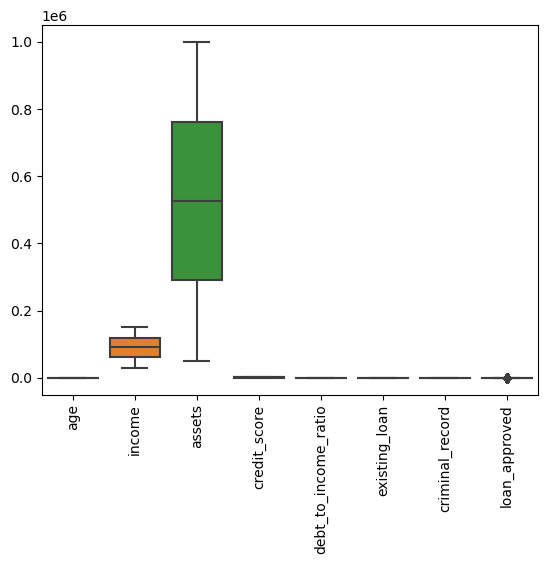

In [6]:
sns.boxplot(df)
plt.xticks(rotation=90)
plt.show()

### Statistical Analysis

In [7]:
print(df.describe(include='all'))

                age         income         assets  credit_score  \
count  12367.000000   12367.000000   12367.000000  12367.000000   
mean      42.487179   90571.593927  525485.720059    699.098996   
std       12.974479   34030.096771  273230.290942    115.078515   
min       20.000000   30006.000000   50013.000000    500.000000   
25%       32.000000   61478.000000  291596.000000    601.000000   
50%       42.487179   90571.593927  525485.720059    699.098996   
75%       53.000000  119635.000000  761670.500000    799.000000   
max       65.000000  149976.000000  999984.000000    900.000000   

       debt_to_income_ratio  existing_loan  criminal_record  loan_approved  
count          12367.000000   12367.000000     12367.000000   12367.000000  
mean               0.300905       0.509097         0.497129       0.113771  
std                0.113162       0.499937         0.500012       0.317545  
min                0.100000       0.000000         0.000000       0.000000  
25%        

#### Correlation

                       age  income  assets  credit_score  \
age                   1.00   -0.00    0.01          0.01   
income               -0.00    1.00    0.01          0.02   
assets                0.01    0.01    1.00          0.01   
credit_score          0.01    0.02    0.01          1.00   
debt_to_income_ratio -0.02    0.01   -0.01         -0.01   
existing_loan         0.01    0.01    0.01          0.00   
criminal_record       0.00    0.01   -0.02          0.01   
loan_approved         0.01   -0.00    0.02          0.32   

                      debt_to_income_ratio  existing_loan  criminal_record  \
age                                  -0.02           0.01             0.00   
income                                0.01           0.01             0.01   
assets                               -0.01           0.01            -0.02   
credit_score                         -0.01           0.00             0.01   
debt_to_income_ratio                  1.00           0.03            

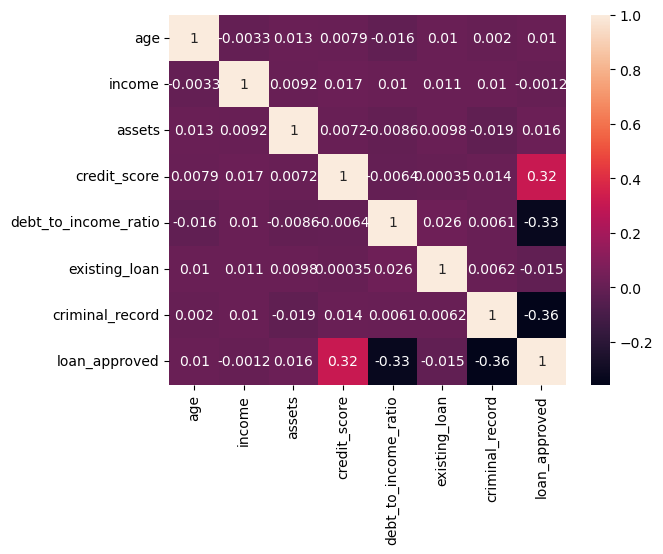

In [8]:
corre = df.corr(numeric_only=True)
print(np.around(corre, decimals = 2))

# plot
sns.heatmap(corre, annot = True)
plt.show()

#### Covariance

                           age        income        assets  credit_score  \
age                     168.34 -1.440300e+03  4.521180e+04         11.87   
income                -1440.30  1.158047e+09  8.515462e+07      65858.22   
assets                45211.80  8.515462e+07  7.465479e+10     227304.78   
credit_score             11.87  6.585822e+04  2.273048e+05      13243.06   
debt_to_income_ratio     -0.02  3.945000e+01 -2.672400e+02         -0.08   
existing_loan             0.07  1.839100e+02  1.336540e+03          0.02   
criminal_record           0.01  1.743200e+02 -2.533230e+03          0.79   
loan_approved             0.04 -1.270000e+01  1.396400e+03         11.57   

                      debt_to_income_ratio  existing_loan  criminal_record  \
age                                  -0.02           0.07             0.01   
income                               39.45         183.91           174.32   
assets                             -267.24        1336.54         -2533.23   
cre

<Axes: >

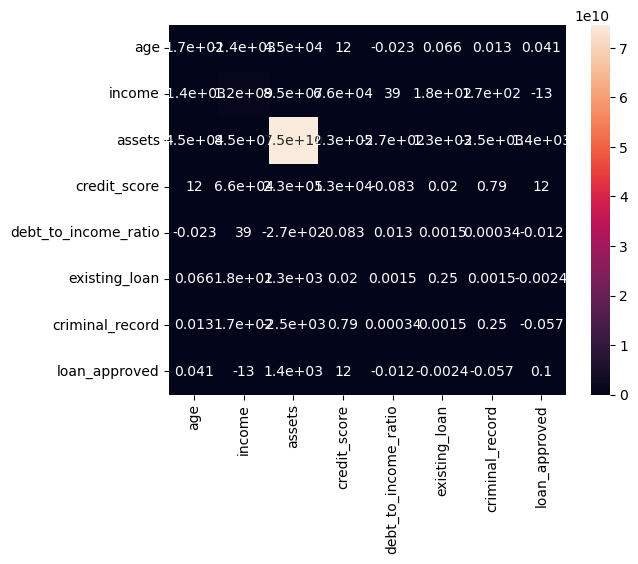

In [9]:
cova = df.cov(numeric_only=True)
print(np.around(cova, decimals = 2))

# plot
sns.heatmap(cova,annot=True)

### Extract Dependent and Independent Variables

In [10]:
x = df[['credit_score', 'debt_to_income_ratio', 'criminal_record']]
y = df.iloc[:, -1]

### Split Train and Test Data

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

### Build Model

#### Scatter Plot

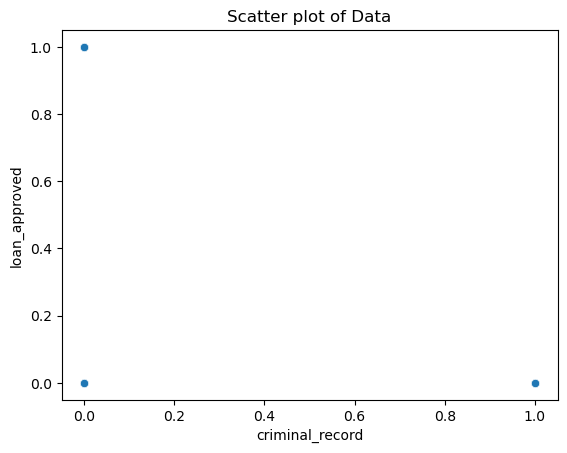

In [12]:
# plot graph
sns.scatterplot(x = "criminal_record", y = "loan_approved", data = df)
plt.title("Scatter plot of Data")
plt.show()

#### Using Random Forest Classifier

In [13]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test= ss.transform(x_test)

# Fitting Random Forest classifier to the training set
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 10, criterion = "entropy")
rfc.fit(x_train, y_train)

# Predicting the test set result
y_pred= rfc.predict(x_test)

#### Evaluation the Algorithm

In [14]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


#### Predicting Accuracy Score

In [15]:
acc = np.around(metrics.accuracy_score(y_test, y_pred), decimals = 3)
print("Accuracy is", acc*100, '%')

Accuracy is 100.0 %


### The data using Random Forest Classifier predicted an accuracy of 100%.